## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Plot 1

C:\Users\Beckh\AppData\Local\Temp\ipykernel_29576\520722301.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot1_df["prevalence_pct"] = plot1_df["val"] * 100


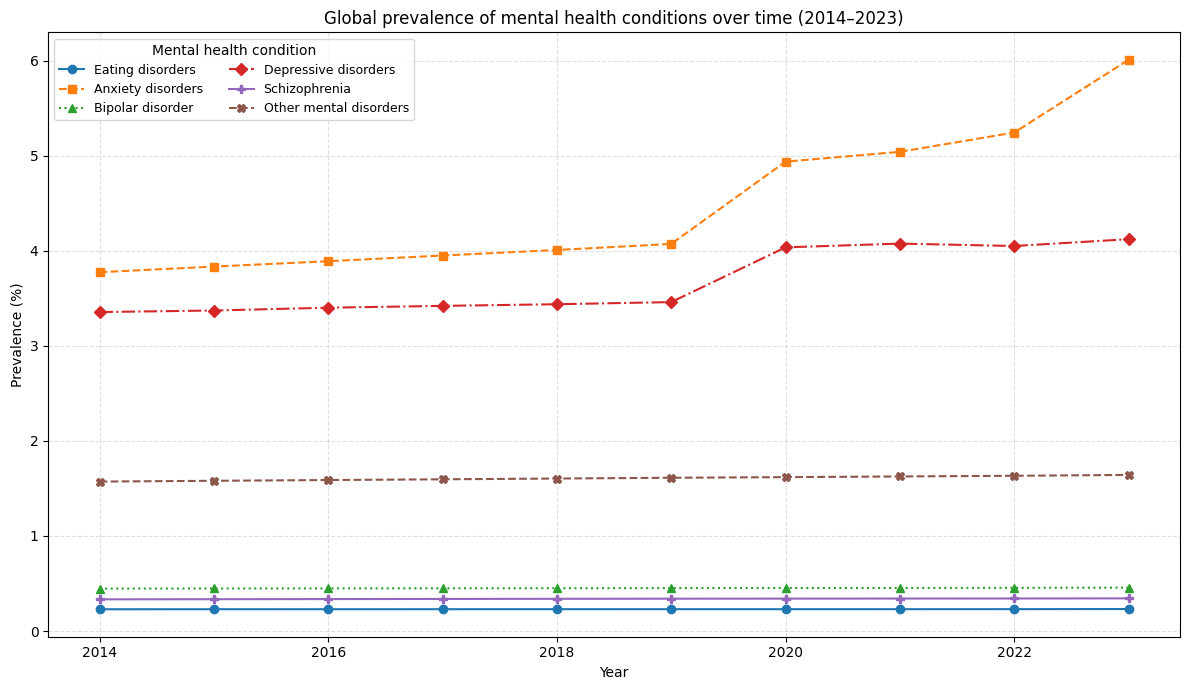

In [20]:
df = pd.read_csv("global_mental_health.csv")

# Filtered df for plot 1 requirements, just for completeness sake (although for some features, there may only be a unique instance)
plot1_df = df[
    (df["measure_name"] == "Prevalence") &
    (df["metric_name"] == "Percent") &
    (df["location_name"] == "Global") &
    (df["age_name"] == "All ages") &
    (df["sex_name"] == "Both") &
    # filter latest 10 years available
    (df["year"] >= 2014) &          # start year
    (df["year"] <= 2023)            # end year
]

# convert prevelance percent to %
plot1_df["prevalence_pct"] = plot1_df["val"] * 100

# sort data by year
plot1_df = plot1_df.sort_values("year")

# line plot
plt.figure(figsize=(12, 7))

# Define marker and line style mappings for accessibility / pass the grayscale test
markers = ["o", "s", "^", "D", "P", "X", "v", "<", ">"]
linestyles = ["-", "--", ":", "-."]

conditions = plot1_df["cause_name"].unique()

for i, condition in enumerate(conditions):
    subset = plot1_df[plot1_df["cause_name"] == condition]
    plt.plot(
        subset["year"],
        subset["prevalence_pct"],
        linestyle=linestyles[i % len(linestyles)],
        marker=markers[i % len(markers)],
        linewidth=1.5,
        alpha=1.0,
        label=condition
    )

plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.title("Global prevalence of mental health conditions over time (2014–2023)")
plt.legend(
    title="Mental health condition",
    fontsize=9,
    title_fontsize=10,
    ncol=2            
)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

## Plot 2


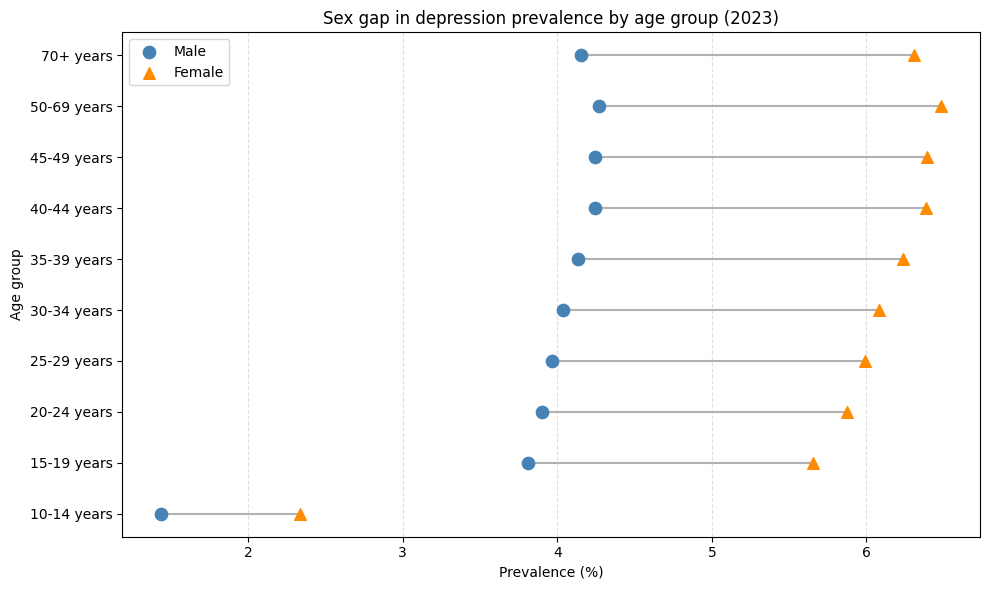

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("global_mental_health_2023.csv")

# -----------------------------
# 2. Filter for Plot 2 criteria
# -----------------------------
plot2_df = df[
    (df["measure_name"] == "Prevalence") &
    (df["metric_name"] == "Percent") &
    (df["location_name"] == "Global") &
    (df["year"] == 2023) &
    (df["cause_name"] == "Depressive disorders") &
    (df["sex_name"].isin(["Male", "Female"]))
].copy()

# Exclude non-informative age groups
exclude_ages = ["<5 years", "5-9 years", "All ages"]
plot2_df = plot2_df[~plot2_df["age_name"].isin(exclude_ages)]

# Convert to percentage
plot2_df["prevalence_pct"] = plot2_df["val"] * 100

# Sort by age
plot2_df = plot2_df.sort_values("age_id")

# -----------------------------
# 3. Split by sex
# -----------------------------
male_df = plot2_df[plot2_df["sex_name"] == "Male"].reset_index(drop=True)
female_df = plot2_df[plot2_df["sex_name"] == "Female"].reset_index(drop=True)

# -----------------------------
# 4. Create dumbbell plot
# -----------------------------
plt.figure(figsize=(10, 6))

for i in range(len(male_df)):
    male_val = male_df.loc[i, "prevalence_pct"]
    female_val = female_df.loc[i, "prevalence_pct"]

    # Connecting line (neutral)
    plt.plot(
        [male_val, female_val],
        [i, i],
        color="gray",
        alpha=0.6,
        zorder=1
    )

    # Male: hollow circle
    plt.scatter(
        male_val,
        i,
        marker="o",
        color = "steelblue",
        s=70,
        linewidths=1.5,
        label="Male" if i == 0 else "",
        zorder=2
    )

    # Female: filled triangle
    plt.scatter(
        female_val,
        i,
        marker="^",
        color="darkorange",
        s=70,
        label="Female" if i == 0 else "",
        zorder=2
    )

# -----------------------------
# 5. Formatting
# -----------------------------
plt.yticks(range(len(male_df)), male_df["age_name"])
plt.xlabel("Prevalence (%)")
plt.ylabel("Age group")
plt.title("Sex gap in depression prevalence by age group (2023)")

plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

## Plot 3